#  Numerical Differentiation & Finding Root

### Computational Physics
### Dr. Zhibo Zhang, Physics Department

---

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Introduction: Numerical Differentiation

Derivatives are everywhere in physics.  Velocity is the time derivative of position.  Acceleration is the time derivative of velocity.  Derivatives tell us about the slope of a function and the minimum or maximum of a function occurs where the derivative is zero.  We use these facts all the time so let’s investigate some numerical derivatives and their applications.

You hear a lot less about numerical derivatives than integrals, for a number of reasons:

1. The basic techniques for numerical derivatives are quite simple, so they don’t take long to explain.

2. Derivatives of known functions can always be calculated analytically, so there’s less need to calculate them numerically. However, there are many cases that we don't really know the function. In such cases, we have to rely on numerical differentiation

3. There are some significant practical problems with numerical derivatives, which means they are used less often then numerical integrals.

The standard definition of a derivative, the one you see in the calculus books, is

$$
\frac{df}{dx} = \lim\limits_{h\rightarrow 0} \frac{f(x+h)−f(x)}{h}
$$

This is the *forward difference* method - it’s simply the slope of the curve $f(x)$ measured over a small interval of width $h$ in the forward direction from $x$.

The backward difference, which has the mirror image definition, is given by

$$
\frac{df}{dx} \simeq \frac{f(x) - f(x-h)}{h}
$$

The forward and backward differences typically give about the same answer and in many cases you can use either. Most often one uses the forward difference. There are a few special cases where one is preferred over the other, particularly when there is a discontinuity in the derivative of the function at the point $x$ or when the domain of the function is bounded and you want the value of the derivative on the boundary, in which case only one or other of the two difference formulas will work. The rest of the time, you just pick whichever one is most convenient. 

A third option is the centered difference, which is given by

$$
\frac{df}{dx} \simeq \frac{f(x+h) - f(x-h)}{2h}
$$

Consider a function like, $y = x^5$.  Numerically in a computer, this function is represented as an array of $y$ values evaluated at $x$ values. 

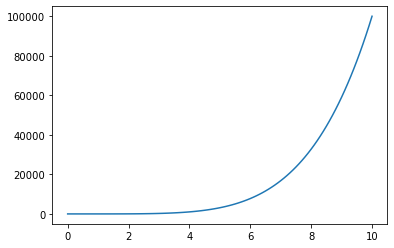

In [2]:
x = np.arange(0.,10.01,0.1)
y = x**5

plt.plot(x,y)

The numerical derivative is calculated using the pre-calculus method of finding $\Delta y$ and dividing by $\Delta x$.  This is only a good approximation to the derivative if $\Delta$ is small, but it’s the best we’ve got.  We are just going to calculate the slope, $\Delta y/\Delta x$ at every point.

In [3]:
dy = np.diff(y) #y(n+1)-y(n)

#Check out the help on the diff method if you want to learn more:
#help(np.diff)

print(len(y), len(dy))
dx = np.diff(x)
dydx = (dy/dx)
print(len(dydx))

101 100
100


The following won’t work. Can you see why?

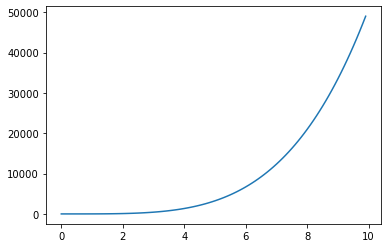

In [4]:
plt.plot(x[0:-1],dydx)

The vector `x` is longer by one element than the derivative vector `dydx`.  If we want to have the `dydx` with the same length as our original `x,y`, we can do:

In [5]:
#specify the size of dy ahead because diff returns an array of n-1 elements
dydx1 = np.zeros(y.shape,float) #we know it will be this size

dydx1[0:-1] = np.diff(y)/np.diff(x)
dydx1[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

which will use the forward finite difference for all elements but the last one, where we use a backward difference.  

Recall the slicing syntax:

    array[:] means take the whole array
    array[2:7] means take the third through 6th elements (Python numbering)
    array[-1] means return the last element in the array (negative numbers count back from the end)
    array[1:-1] means take everything but the first and last elements in the array


To appreciate how array slicing like `array[2:7]` works, think of the left-hand-side of the colon as one index and the right-hand-side as another and implement any logic for each side separately.  So for example, to implement the two-point forward difference using any arbitrary start and end points, `i` and `j` you would use:

```
dydx[i:j] = (y[i+1:j+1] - y[i:j])/(x[i+1:j+1] - x[i:j])
```

As an alternative to the two-point forward difference, we can calculate the slope at the center of each x-bin.  In this case, we have to treat the first and last elements specially, but we can use array slices for everything in between:

In [6]:
#calculate dydx by center differencing using array slices
dydx2 = np.zeros(y.shape,float) #we know it will be this size

dydx2[1:-1] = (y[2:] - y[:-2])/(x[2:] - x[:-2]) #center difference

dydx2[0] = (y[1]-y[0])/(x[1]-x[0]) #forward difference

dydx2[-1] = (y[-1] - y[-2])/(x[-1] - x[-2]) #backward difference

Let’s compare our numerical derivatives to the exact value: 
    
$$\frac{dy}{dx} = 5x^4$$

In [7]:
dydxExact = 5*x**4

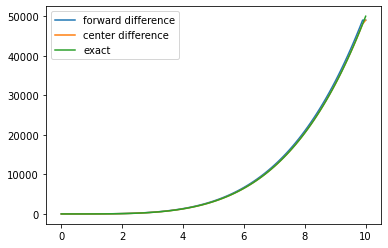

In [8]:
plt.plot(x,dydx1,label='forward difference')
plt.plot(x,dydx2,label='center difference')
plt.plot(x,dydxExact,label='exact')
plt.legend(loc='upper left')
plt.show()

They are *slightly* different but it is hard to see.  Let’s plot the error introduced by our numerical derivatives.  Start from the second value in the array to avoid dividing by zero.

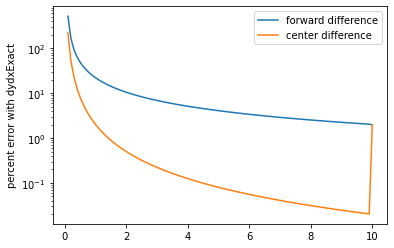

In [9]:
percentError1 = 100*abs( dydx1[1:] - dydxExact[1:] )/dydxExact[1:]
percentError2 = 100*abs( dydx2[1:] - dydxExact[1:] )/dydxExact[1:]

#Use a semilog y-axis to see the variation better
plt.semilogy(x[1:], percentError1, label='forward difference')
plt.semilogy(x[1:], percentError2, label='center difference')
plt.ylabel("percent error with dydxExact")
plt.legend(loc="upper right")
plt.show()

Since the center difference is the more accurate of the two, we'll generally use that one. The overall accuracy of the derivative depends on the spacing of points. You can explore this phenomenon further with the accompanying exercises.

---

## Introduction: Finding Root

Finding the zero of a function (i.e., finding the root) is a very common task in physics. As we learned in the class, there are two ways to find the root of a given function: Bisection method and Newton's method

###Bisection method
The Bisection method is a simple method to find the zero of a function. TWe only need to specify the function $f(x)$ and two values of $x$ between which $f(x)$ is zero - let's call those two points $x_1$ and $x_2$. As $f(x)$ equals zero somewhere between $x_1$ and $x_2$, that means that $f(x)$ is positive at $x_1$ or $x_2$ and negative at the other one. In other words, the product of the two function values is negative: $f(x_1)f(x_2)<0$. If this condition is fulfilled, all we know is that $f(x)$ is zero somewhere in the interval between $x_1$ and $x_2$ (provided $f(x)$ is continuous, of course). The basic idea of the bisection method is to iterate towards the zero of the function by cutting the interval in half every iteration. This is done by computing the middle between $x_1$ and $x_2$, let's call that point $x_m$, and compute $f(x_m)$. Next, replace either $x_1$ or $x_2$ by $x_m$ making sure that $f(x)$ remains negative at one of the two values and positive at the other. Repeat the process until the interval is small enough. In summary, the algorithm works as follows:

1. Compute $f(x)$ at $x_1$ and $x_2$ and make sure that $f(x_1)f(x_2)<0$.
2. Compute $x_m = \frac{1}{2}(x_1+x_2)$.
3. Compute $f(x_m)$.
4. If $f(x_m)f(x_2)<0$, replace $x_1$ by $x_m$, otherwise, replace $x_2$ by $x_m$.
5. Test whether $|x_1-x_2|<\varepsilon$, where $\varepsilon$ is a user-specified tolerance. If this is not yet the case, return to step 2.

###Exercise 1. <a name="back1"></a>Bisection method

*Step 1.*
Write a Python function for $f(x)=\frac{1}{2}-\text{e}^{-x}$. Create a plot of $f(x)$ for $x$ varying from 0 to 4. Notice that $f(x)$ has a zero somewhere on the plotted interval (for this example it isn't really that hard to determine the zero exactly, of course, and we will do that later on to test whether our code works correctly).

0.6931471805599453
-0.24084218055563292


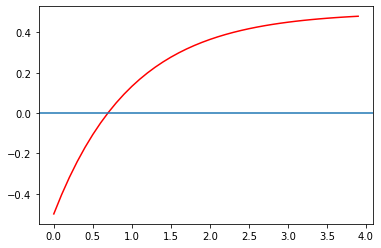

In [12]:
def f(x):
    return 1.0/2.0 - np.exp(-x)
def fp(x):
    return np.exp(-x)
x = np.arange(0,4, 0.1)
plt.plot(x,f(x),'r',lw=1.5)
plt.axhline(0.0)
print(-np.log(0.5))
print(f(0)*f(4))

*Step 2.* Implement the bisection method in a function called `bisection`. Your `bisection` method should take the following arguments:

1. The function for which you want to find the zero.
2. $x_1$ and $x_2$
3. The tolerance `tol` used as a stopping criterion. Make `tol` a keyword argument with a default value of 0.001.
4. The maximum number of iterations `nmax`. Make `nmax` a keyword argument with a default value of, for example, 10.

Your function should return the value of $x$ where $f(x)$ equals (approximately) zero. Your function should print a warning to the screen when the maximum number of iterations is reached before the tolerance is met.

In writing your code, implement steps 2-5 of the algorithm explained above in a regular loop that you perform `nmax` times and break out of the loop (using the `break` command) when the tolerance is met. Doing it this way will prevent you from getting stuck in an infinite loop, which may happen if you use a `while` loop. 
In writing your code it is advisable to print the values of $x_1$, $x_2$, $f(x_1)$, and $f(x_2)$ to the screen every iteration, so you can see how your `bisection` function performs (or whether you have any bugs left). 

Use your `bisection` method to find the zero of the function $f(x)$ you programmed in Step 1 and make sure it is within `tol=0.001` of the exact value (which you can determine by hand). 

In [13]:
def bisection(func, x1,x2, tol=1e-3,nmax=30):
    f1 = func(x1)
    f2 = func(x2)
    if f1*f2>0:
        print('f(x1)*f(x2) should be negative')
        return 
    for i in range(nmax):
        xm = 0.5*(x1+x2)
        fm = func(xm)
        if fm*f1<0:
            x2 = xm
        else:
            x1 = xm
        if abs(x1-x2) <= tol:
            return x1
        print(' iteration',i+1)

x0 = bisection(f, 0, 4.0, tol=1e-5,nmax=30)
x0_an = -np.log(0.5)
print ('analytical solution', x0_an)
print ('err', abs(x0-x0_an))


 iteration 1
 iteration 2
 iteration 3
 iteration 4
 iteration 5
 iteration 6
 iteration 7
 iteration 8
 iteration 9
 iteration 10
 iteration 11
 iteration 12
 iteration 13
 iteration 14
 iteration 15
 iteration 16
 iteration 17
 iteration 18
analytical solution 0.6931471805599453
err 1.4286068202862268e-06


*Step 3*
Demonstrate that your `bisection` method works correctly by finding the zero of cos($x$) between $x_1=0$ and $x_2=3$ running the following command:

`bisection(np.cos, 0, 3, tol=1e-6, nmax=30)`

The Bisection method is a brute-force method that is guaranteed to work when the user specifies an interval from $x_1$ to $x_2$ that contains a zero (and the function is continuous). The Bisection method is not very efficient (it requires a lot of function evaluations) and it is inconvienient that the user has to specify an interval that contains the zero. A smarter alternative is Newton's method (also called the Newton-Raphson method), but it is, unfortunately, not guaranteed that it always works, as is explained below. 

Let's try to find the zero of the function represented by the blue line in the graph below. Newton's method starts at a user-defined starting location, called $x_0$ here and shown with the blue dot. A straight line is fitted through the point $(x,y)=(x_0,f(x_0))$ in such a way that the line is tangent to $f(x)$ at $x_0$ (the red line). The intersection of the red line with the horizontal axis is the next estimate $x_1$ of the zero of the function (the red dot). This process is continued until a value of $f(x)$ is found that is sufficiently small. Hence, a straight line is fitted through the point $(x,y)=(x_1,f(x_1))$, again tangent to the function, and the intersection of this line with the horizontal axis is the next best estimate of the zero of the function, etc., etc.


<img src="http://i.imgur.com/tK1EOtD.png" alt="Newton's method on wikipedia">

The equation for a straight line with slope $a$ and through the point $x_n,f(x_n)$ is

$y = a(x-x_n) + f(x_n)$

As we want the line to be tangent to the function $f(x)$ at the point $x=x_n$, the slope $a$ is equal to the derivative of $f(x)$ at $x_n$: $a=f'(x_n)$. To find the intersection of the line with the horizontal axis, we have to find the value of $x$ that results in $y=0$. This is our next estimate $x_{n+1}$ of the zero of the function. Hence we need to solve

$0 = f'(x_n) (x_{n+1}-x_n) + f(x_n)$

which gives

$\boxed{x_{n+1} = x_n -\frac{f(x_n)}{f'(x_n)}}$

The search is completed when $|f(x)|$ is below a user-specified tolerance.
A nice animated illustration of Newton's method can be found on wikipedia.

<img src="http://upload.wikimedia.org/wikipedia/commons/e/e0/NewtonIteration_Ani.gif" alt="Newton's method on wikipedia" width="400px">

Newton's method is guaranteed to find the zero of a function if the function is *well behaved* and you start your search *close enough* to the zero. If those two conditions are met, Newton's method is very fast. If they are not met, the method does not converge to the zero. Another disadvantage of Newton's method is that you need to define the derivative of the function. Strangely enough, the function value doesn't have to go down every iteration (as is illustated in the figure above going from $x_2$ to $x_3$).

###Exercise 2. <a name="back2"></a>Newton's method
Implement Newton's method in a Python function called `newtonsmethod` and test your function by finding the zero of $f(x)=\frac{1}{2}-\text{e}^{-x}$, as we used in Exercise 1. Use $x_0=1$ as the starting point of your search. The `newtonsmethod` function should take the following arguments:

1. The function for which you want to find the zero.
2. The derivative of the function for which you want to find the zero.
3. The starting point of the search $x_0$.
4. The tolerance `tol` used as a stopping criterion. Make `tol` a keyword argument with a default value of $10^{-6}$.
5. The maximum number of iterations `nmax`. Make `nmax` a keyword argument with a default value of 10.

Your function should return the value of $x$ where $f(x)$ equals (approximately) zero. Your function should print a warning to the screen when the maximum number of iterations is reached before the tolerance is met. 

It is suggested to print the value of $x_{n+1}$ and the corresponding function value to the screen every iteration so you know whether your function is making good progress. If you implement everything correctly, you should find a zero that gives a function value less than $10^{-6}$ within 3 iterations if you start at $x=1$. How many iterations do you need when you start at $x=4$?

In [12]:
def newton(func, fp, xs, tol=1e-3,nmax=30):
        f = func(xs)
        for i in np.arange(nmax):
            fprime = fp(x0)
            xs = xs - f/fprime
            f = func(xs)
            if abs(f) < tol: 
                print('tolerance reached in',i+1,'iterations')
                break
        if abs(f) > tol:
            print ('Max number of iterations reached before convergence')
        return xs
    
print ('starting at x=1')
xzero = newton(f,fp,1)
print ('xzero,f(xzero) ',xzero,f(xzero))

print('starting at x=4')
xzero = newton(f,fp,4,nmax=40)
print('xzero,f(xzero) ',xzero,f(xzero))

starting at x=1
tolerance reached in 2 iterations
xzero,f(xzero)  0.6940423752639113 0.0004473970683622208
starting at x=4
tolerance reached in 6 iterations
xzero,f(xzero)  0.6932759437277134 6.437743907361515e-05


Demonstrate that your `newton` function works by finding the zero of $\sin(x)$. As you know, the $\sin(x)$ function has many zeros: $-2\pi$, $-\pi$, $0$, $pi$, $2\pi$, etc. Which zero do you find when starting at $x=1$ and which zero do you find when starting at $x=1.5$?

### Root finding methods in `scipy`
The package `scipy.optimize` includes a number of routines for the minimization of a function and to find the zeros of a function. Two of the rootfinding methods are called, no suprise, `bisect` and `newton`. 

### Exercise <a name="back3"></a>3
Use the `newton` method of `scipy.optimize` package to find the $x$ value for which $\ln(x^2)=2$ (i.e., find the zero of the function $\ln(x^2)-2$), and demonstrate that your value of $x$ indeed gives $\ln(x^2)=2$.

In [13]:
import scipy.optimize as so

def g(x):
    return np.log(x**2)-2

x = so.newton(g,10)
print ('value of x:', x)
print ('ln(x^2):', np.log(x**2))

value of x: -2.7182818284590455
ln(x^2): 2.0000000000000004


In [14]:
help(so.newton)


Help on function newton in module scipy.optimize.zeros:

newton(func, x0, fprime=None, args=(), tol=1.48e-08, maxiter=50, fprime2=None, x1=None, rtol=0.0, full_output=False, disp=True)
    Find a zero of a real or complex function using the Newton-Raphson
    (or secant or Halley's) method.
    
    Find a zero of the function `func` given a nearby starting point `x0`.
    The Newton-Raphson method is used if the derivative `fprime` of `func`
    is provided, otherwise the secant method is used. If the second order
    derivative `fprime2` of `func` is also provided, then Halley's method is
    used.
    
    If `x0` is a sequence with more than one item, then `newton` returns an
    array, and `func` must be vectorized and return a sequence or array of the
    same shape as its first argument. If `fprime` or `fprime2` is given, then
    its return must also have the same shape.
    
    Parameters
    ----------
    func : callable
        The function whose zero is wanted. It must be